In [7]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '../..'))

from PySDM.physics import si
from PySDM.initialisation.spectral_sampling import ConstantMultiplicity
from PySDM.initialisation.spectra import Exponential
from PySDM.physics.formulae import volume

TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'

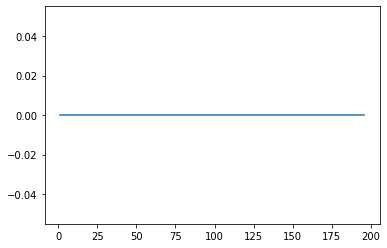

In [11]:
n_sd = 2**15
initial_spectrum = Exponential(norm_factor=8.39e12, scale=1.19e5 * si.um ** 3)
attributes = {}
attributes['volume'], attributes['n'] =\
    ConstantMultiplicity(spectrum=initial_spectrum).sample(n_sd)

from PySDM import Builder
from PySDM.environments import Box
from PySDM.dynamics import Coalescence
from PySDM.dynamics.coalescence.kernels import Golovin
from PySDM.backends import CPU
from PySDM.products.state import ParticlesNumberVolumeSpectrum, KthMoment

builder = Builder(n_sd=n_sd, backend=CPU)
builder.set_environment(Box(dt=1 * si.s))
builder.add_dynamic(Coalescence(kernel=Golovin(b = 0.01 / si.um**3 / si.s)))
products = [ParticlesNumberVolumeSpectrum(), KthMoment()]
particles = builder.build(attributes, products)

from PySDM.physics.constants import rho_w
from matplotlib import pyplot
import numpy as np

v_bins_edges = np.logspace(np.log10(1 * si.um**3), np.log10(200 * si.um**3), num=256)

for step in [0, 1]:
    particles.run(step - particles.n_steps)
    pyplot.step(x=v_bins_edges[:-1] / si.um**3,
                y=particles.products['N(v)'].get(v_bins_edges),
                where='post', label=f"t = {step}s")
                